<a href="https://colab.research.google.com/github/FGalvao77/Tecnicas-de-pre-processamento-de-dados/blob/main/T%C3%A9cnicas_de_pr%C3%A9_processamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Técnicas de pré-processamento de dados**
---
---

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
url_data = 'https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv'

In [ ]:
autos = pd.read_csv(url_data)
autos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
autos = autos.drop('normalized-losses', axis=1)
autos.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [ ]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       203 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    int64  
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [ ]:
autos = autos.fillna(0)

In [ ]:
# autos = autos.dropna()

In [ ]:
autos.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
feats_select = autos.columns[autos.dtypes == 'float64']
feats_select

Index(['wheel-base', 'length', 'width', 'height', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'price'],
      dtype='object')

In [ ]:
autos[feats_select].head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,111.0,5000.0,13495.0
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,111.0,5000.0,16500.0
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,154.0,5000.0,16500.0
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,102.0,5500.0,13950.0
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,115.0,5500.0,17450.0


In [ ]:
autos[feats_select].describe()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,3.264780,3.191902,10.142537,103.239024,5075.365854,12949.429268
std,6.021776,12.337289,2.145204,2.443522,0.535268,0.549625,3.972040,40.832470,694.650771,8079.043284
min,86.600000,141.100000,60.300000,47.800000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.100000,52.000000,3.130000,3.100000,8.600000,70.000000,4800.000000,7689.000000
50%,97.000000,173.200000,65.500000,54.100000,3.310000,3.290000,9.000000,95.000000,5200.000000,10198.000000
75%,102.400000,183.100000,66.900000,55.500000,3.580000,3.410000,9.400000,116.000000,5500.000000,16500.000000
max,120.900000,208.100000,72.300000,59.800000,3.940000,4.170000,23.000000,288.000000,6600.000000,45400.000000


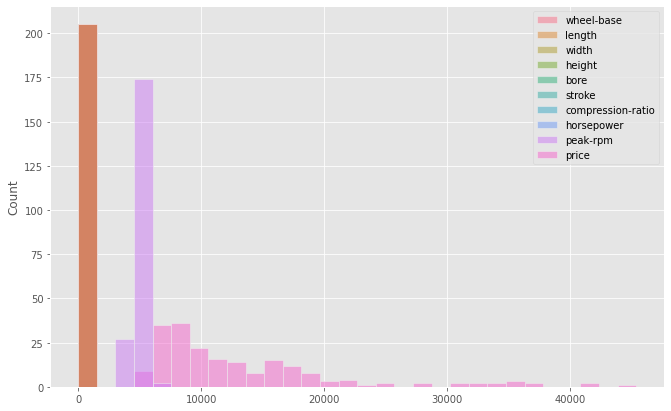

In [ ]:
plt.figure(figsize=(11, 7))
sns.histplot(data=autos[feats_select], bins=30);

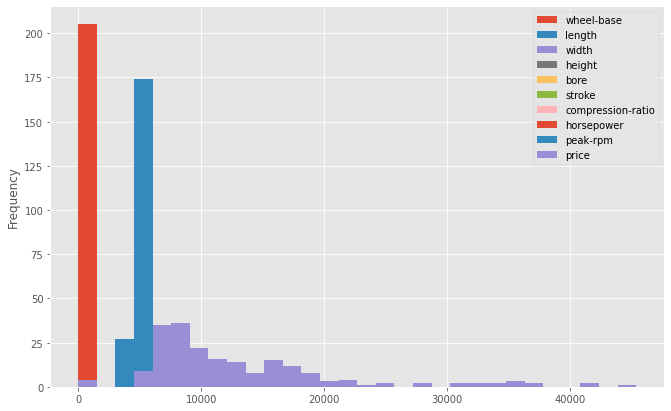

In [ ]:
autos[feats_select].plot(kind='hist', bins=30, figsize=(11, 7));

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
def mm_scaler(data, cols):
    mm = MinMaxScaler()
    data_scal = mm.fit_transform(data[cols].values)
    return pd.DataFrame(data_scal, columns=feats_select)

In [ ]:
autos_1 = mm_scaler(autos, feats_select)
autos_1.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,price
0,0.058309,0.413433,0.316667,0.083333,0.880711,0.642686,0.1250,0.385417,0.757576,0.297247
1,0.058309,0.413433,0.316667,0.083333,0.880711,0.642686,0.1250,0.385417,0.757576,0.363436
2,0.230321,0.449254,0.433333,0.383333,0.680203,0.832134,0.1250,0.534722,0.757576,0.363436
3,0.384840,0.529851,0.491667,0.541667,0.809645,0.815348,0.1875,0.354167,0.833333,0.307269
4,0.373178,0.529851,0.508333,0.541667,0.809645,0.815348,0.0625,0.399306,0.833333,0.384361


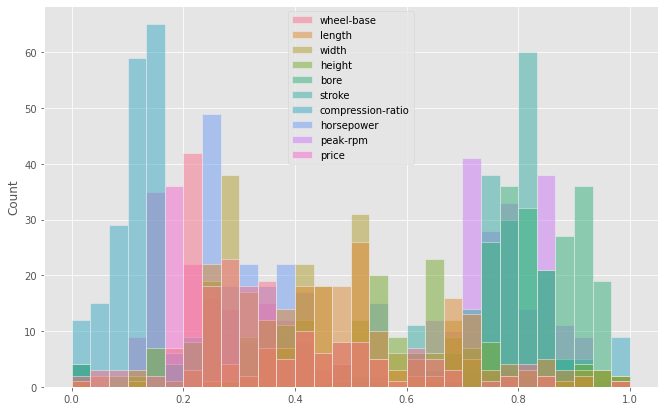

In [ ]:
plt.figure(figsize=(11, 7))
sns.histplot(data=autos_1[feats_select], bins=30);

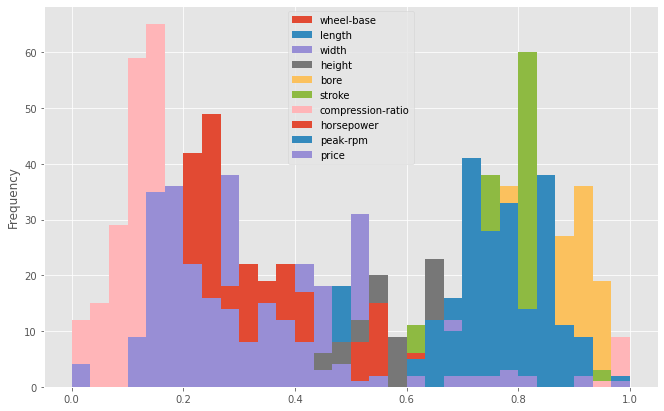

In [ ]:
autos_1[feats_select].plot(kind='hist', bins=30, figsize=(11, 7));

In [ ]:
def std_scaler(data, cols):
    std = StandardScaler()
    data_scal = std.fit_transform(data[cols].values)
    return pd.DataFrame(data_scal, columns=feats_select)

In [ ]:
autos_2 = std_scaler(autos, feats_select)
autos_2.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,price
0,-1.690772,-0.426521,-0.844782,-2.020417,0.384335,-0.933646,-0.288349,0.190534,-0.108760,0.067694
1,-1.690772,-0.426521,-0.844782,-2.020417,0.384335,-0.933646,-0.288349,0.190534,-0.108760,0.440555
2,-0.708596,-0.231513,-0.190566,-0.543527,-1.095176,0.507215,-0.288349,1.246195,-0.108760,0.440555
3,0.173698,0.207256,0.136542,0.235942,-0.140049,0.379544,-0.035973,-0.030418,0.612788,0.124151
4,0.107110,0.207256,0.230001,0.235942,-0.140049,0.379544,-0.540725,0.288735,0.612788,0.558431


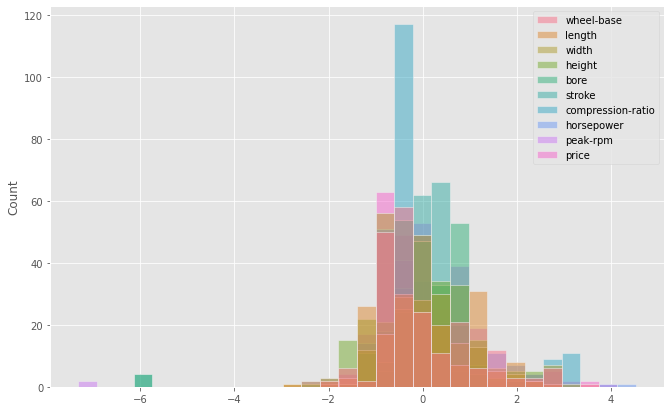

In [ ]:
plt.figure(figsize=(11, 7))
sns.histplot(data=autos_2[feats_select], bins=30);

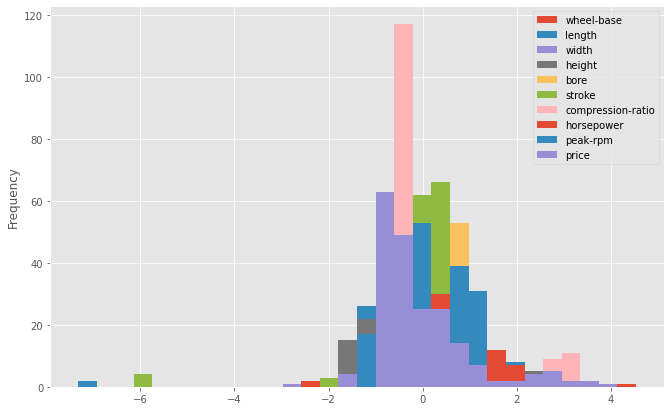

In [ ]:
autos_2[feats_select].plot(kind='hist', bins=30, figsize=(11, 7));

In [ ]:
def rob_scaler(data, cols):
    rob = RobustScaler()
    data_scal = rob.fit_transform(data[cols].values)
    return pd.DataFrame(data_scal, columns=feats_select)

In [ ]:
autos_3 = rob_scaler(autos, feats_select)
autos_3.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,horsepower,peak-rpm,price
0,-1.063291,-0.261905,-0.500000,-1.514286,0.355556,-1.967742,0.00,0.347826,-0.285714,0.374191
1,-1.063291,-0.261905,-0.500000,-1.514286,0.355556,-1.967742,0.00,0.347826,-0.285714,0.715242
2,-0.316456,-0.119048,0.000000,-0.485714,-1.400000,0.580645,0.00,1.282609,-0.285714,0.715242
3,0.354430,0.202381,0.250000,0.057143,-0.266667,0.354839,1.25,0.152174,0.428571,0.425831
4,0.303797,0.202381,0.321429,0.057143,-0.266667,0.354839,-1.25,0.434783,0.428571,0.823062


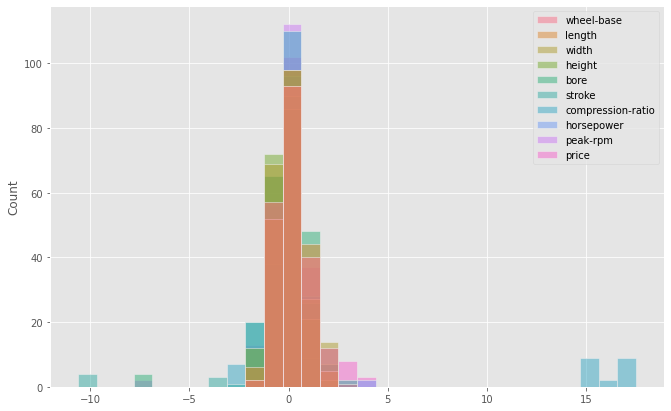

In [ ]:
plt.figure(figsize=(11, 7))
sns.histplot(data=autos_3[feats_select], bins=30);

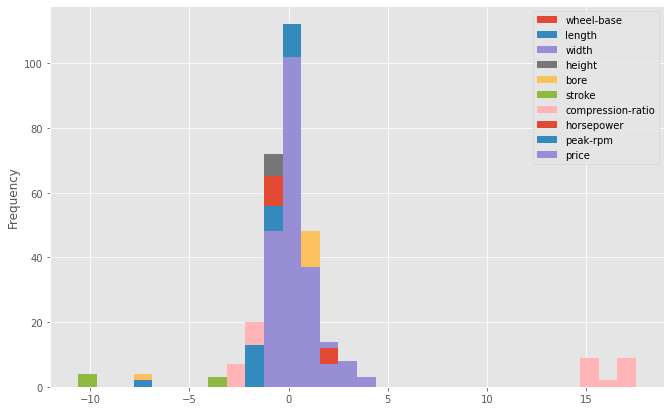

In [ ]:
autos_3[feats_select].plot(kind='hist', bins=30, figsize=(11, 7));